- Check in all numerical columns for outlier.
 2 ways of outlier detection:-

1. When data is normally distributed
2. When data is not normally distributed


- When data is normally distributed we use "standard deviation" logic 3+ , 3-
- When data is not normally distributed we use "box plot"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df= pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


In [6]:
df.shape

(3677, 23)

In [7]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

# Price

In [8]:
#Outliers on the basis of Price column

/tmp/ipykernel_49857/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

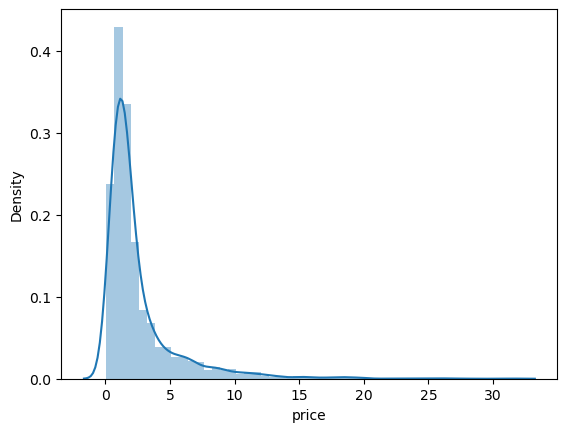

In [9]:
sns.distplot(df['price'])

- Check the distribution of price column and found it is "right skewed"


<Axes: xlabel='price'>

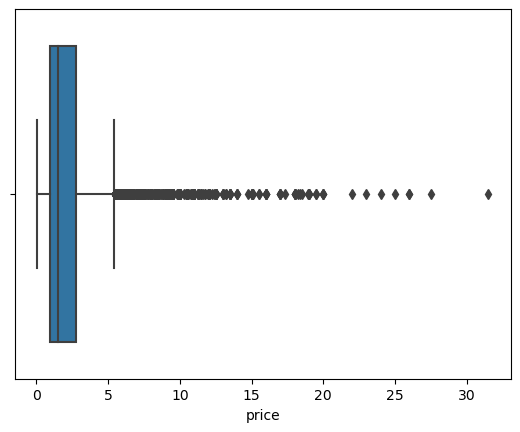

In [10]:
sns.boxplot(x=df['price'])

- Run box plot and check how much outliers we have in price data.
- From boxplot its look lie above 5cr price flats value is outliers.


In [11]:
# calculate the IQR for the Price column

In [12]:
Q1= df['price'].quantile(0.25)
Q3= df['price'].quantile(0.75)
IQR= Q3-Q1

# Define Bounds for Outliers

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
b
# Identify Outliers

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics

num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

-  Now extracting the rows which are count as "outlier" by using IQR and Upper and lower bound .


In [13]:
outliers.sort_values('price', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2479,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,74
1856,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
1786,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
3531,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2438,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3439,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
3377,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
3388,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
1480,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
2226,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97


**Observation**

- Upon checking the distribution of the price column, it was observed to be right- skewed.
- A box-plotwas employed to identify outliers in the price data,indicating values above 5 crore as potential outliers.
- Rows considered as outliers were extracted based on the Interquartile Range (IQR) and upper/lower bounds.
- Approximately 425 properties were identified  as outliers.
- Analysis of descriptive statistics for the outlier data revealed a mean value of 9 crore.
- The minimum price was 5 crore, and the maximum reached 31 crore.
- on the basis of price column we can say that there are some genuine outliers but there are some data error as well.


# Price Per Sqft

/tmp/ipykernel_49857/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

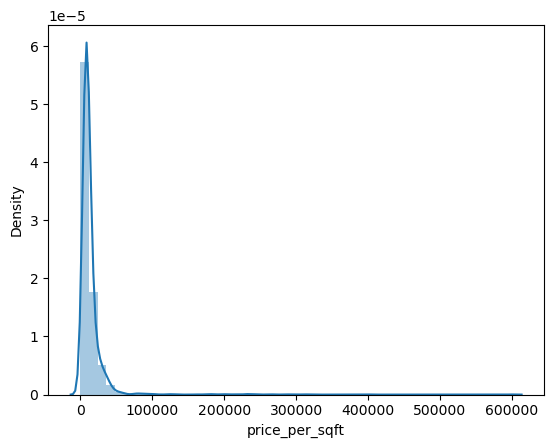

In [14]:
sns.distplot(df['price_per_sqft'])

- It is also heavily right skewed. Certain properties price per square feet is around 6lakh rupees. Which is data error or some outlier.



<Axes: >

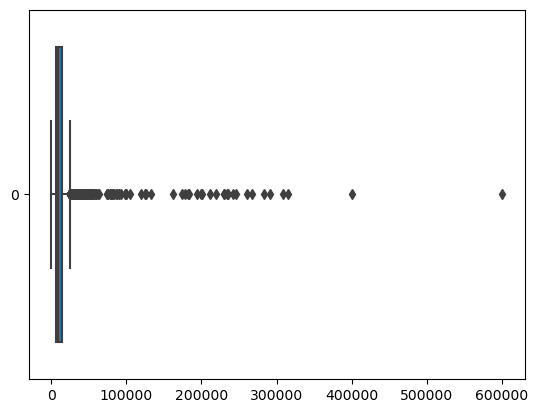

In [16]:
sns.boxplot(df['price_per_sqft'], orient='h')

- Apply IQR and find there are 354 outliers. 

In [17]:
# calculate the IQR for Price per sqft column

In [19]:
Q1= df['price_per_sqft'].quantile(0.25)
Q3= df['price_per_sqft'].quantile(0.75)
IQR = Q3- Q1

# define bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers

outliers_sqft =  df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# displaying outliers and some statisitcs

num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats= outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

- And after apply descriptive statistics found mean value itself very high which is 52592 .


In [23]:
outliers_sqft

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.00,3743.000000,0,1,0,0,0,1,105
23,house,independent,sector 26,8.49,47167.0,1800.0,Plot area 200(167.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,1800.00,NaN,0,1,0,1,0,2,42
24,house,independent,sector 25,6.50,36111.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3+,2.0,North-East,Moderately Old,NaN,1800.00,NaN,1,1,1,1,0,0,61
67,house,independent,sector 24,1.45,26852.0,540.0,Plot area 60(50.17 sq.m.),3,3,1,NaN,NaN,Old Property,NaN,540.00,NaN,0,0,0,0,0,0,9
80,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),6,6,3+,3.0,North-East,Moderately Old,NaN,546.00,NaN,0,0,0,0,0,2,40
88,house,independent,sector 45,10.00,30864.0,3240.0,Plot area 360(301.01 sq.m.),6,6,3+,4.0,North-East,Moderately Old,NaN,3240.00,NaN,1,1,1,1,0,2,70
101,house,independent,sector 28,11.75,41315.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.00,NaN,1,1,1,0,0,2,54
106,house,independent,sector 25,16.00,26667.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6,5,2,3.0,East,Relatively New,NaN,6000.00,NaN,0,0,0,0,0,0,0
109,house,independent house sector 45,sector 40,9.00,38022.0,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000...,12,12,3,4.0,North-West,New Property,NaN,9000.00,6000.000000,0,1,0,0,0,2,71
135,house,emaar mgf marbella,sector 66,8.70,38667.0,2250.0,Plot area 250(209.03 sq.m.)Built Up area: 267 ...,4,5,2,3.0,East,New Property,NaN,267.00,NaN,1,1,0,0,0,0,144


- So after watching data found some area still in square yard which needs to convert in square feet.


In [24]:
outliers_sqft['area']= outliers_sqft['area'].apply(lambda x:x *9 if x< 1000 else x)

/tmp/ipykernel_49857/1534875368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']= outliers_sqft['area'].apply(lambda x:x *9 if x< 1000 else x)


- So apply square feet formula where area is less than 1000.


In [25]:
outliers_sqft['price_per_sqft']= round((outliers_sqft['price']*10000000)/outliers_sqft['area']) 

/tmp/ipykernel_49857/358944230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft']= round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


- Again calculated price per square feet for outliers values.


In [26]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

- So after that apply describe and found value improved little bit. Now mean is 29357 and max value decrease from 6lakh to 82540.


In [27]:
df.update(outliers_sqft)

/tmp/ipykernel_49857/4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
/tmp/ipykernel_49857/4262394064.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_sqft)
/tmp/ipykernel_49857/4262394064.py:1: FutureWarning: Downcasting behavior in S

- Then updated this outlier dataframe into main data.


/tmp/ipykernel_49857/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

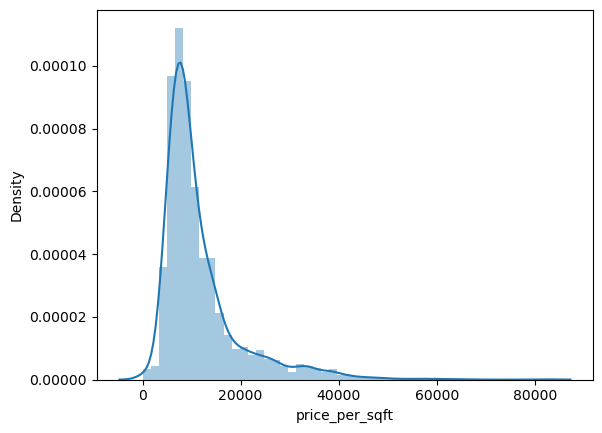

In [28]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

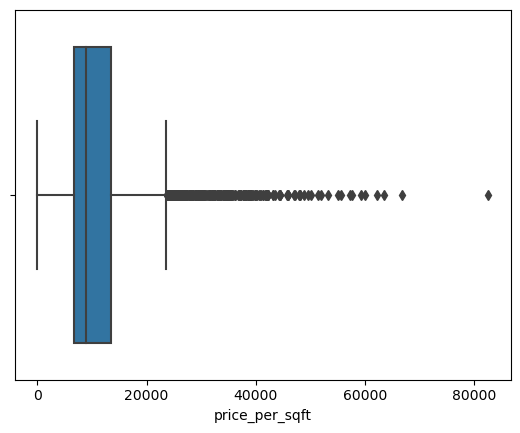

In [31]:
sns.boxplot(x = df['price_per_sqft'], orient ='h')

In [33]:
df[df['price_per_sqft']> 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
160,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
383,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,137
939,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1305,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1365,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,1,75
1498,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,1,72
1786,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
2278,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,160
2424,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
3024,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99


- Now plot value which is above 50000 price per square feet.

- So found 13 values above 50000 price per square feet.




In [34]:
df = df[df['price_per_sqft']<= 50000]

- So removed them by considering as outliers.

<Axes: xlabel='price_per_sqft'>

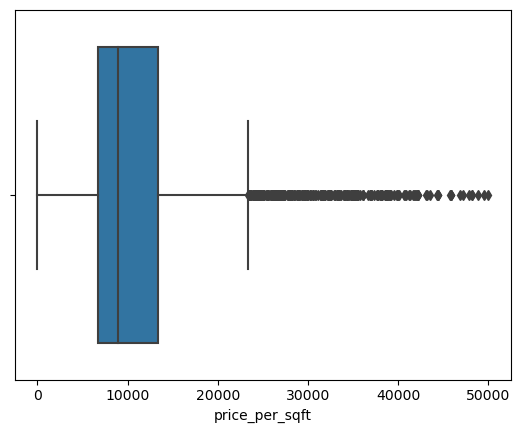

In [35]:
sns.boxplot(x=df['price_per_sqft'])

**Observation**

- The dataset initially displayed a significant right skewness, particularly noticeable with some properties exhibiting a remarkably high price per square foot, reaching upto 6lakh rupees.
- To address the skewness, the interquartile range (IQR) was applied, revealing the presence of 354 outliers in the dataset.
- Examination of descriptive statistics indicated an unusually high mean value of 52,592, suggesting the impact of outliers on the overall dataset.
- Further investigation uncovered that some area values were still in square yards. A conversion to square feet was performed for areas less than 1000, ensuring consistency in the dataset.
- The conversion prompted a recalculation of the price per square foot for outliers, contributing to a subsequent improvement in descriptive statistics. The mean decreased to 29,357, and the maximum value dropped from 6lakh to 82,540.
- The updated outlier dataframe, reflecting the corrections, was integrated back into the main dataset.
- A plot was generated to identify values with a price per square foot above 50,000, revealing 13 such values. These outliers were subsequently removed from the dataset to enhance data integrity.

 # Area

/tmp/ipykernel_49857/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

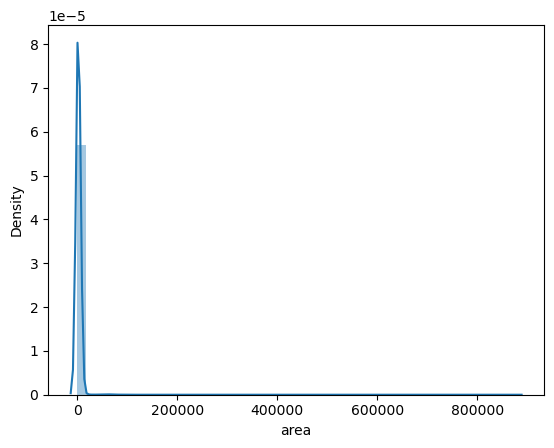

In [36]:
sns.distplot(df['area'])

- Because of extreme outlier value area graph is skewed. 

<Axes: >

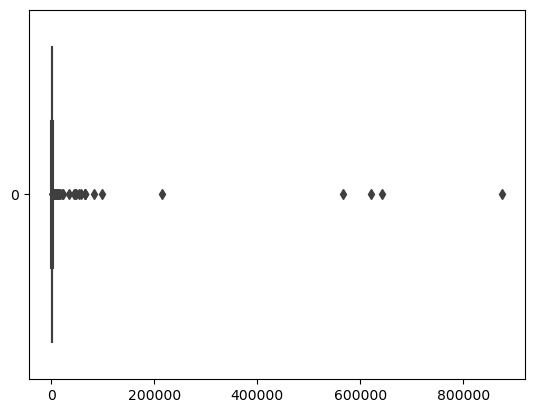

In [38]:
sns.boxplot(df['area'], orient='h')

In [39]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

-  Apply describe function and find mean  is on higher side compared to median. By looking maximum value its clear there is outliers.


In [41]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
519,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2047,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
2275,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
2948,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44
3621,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0


- Identified the  rows where area is greater than 1lakh rupees. I remove these properties as price is very less given compare to area.



In [42]:
df = df[df['area'] < 100000]

/tmp/ipykernel_49857/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

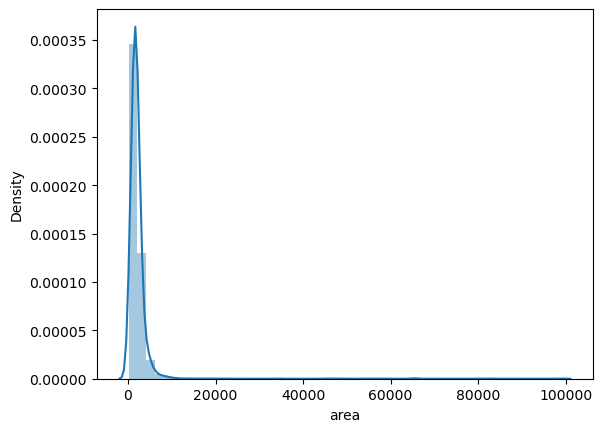

In [43]:
sns.distplot(df['area'])

- By doing this improved  dist plot now skewedness little improved.


<Axes: xlabel='area'>

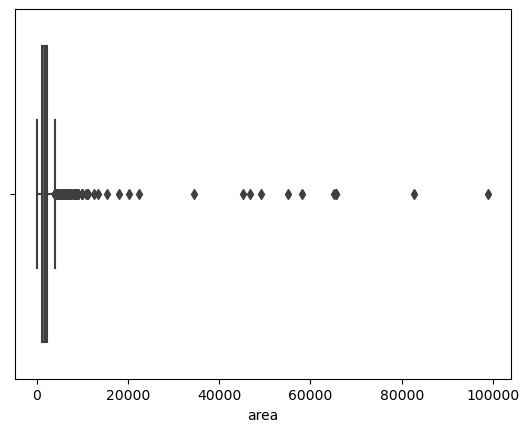

In [44]:
sns.boxplot(x= df['area'])

In [45]:
df[df['area']> 10000].sort_values('area', ascending=False)
#531 , 128, 866, 3745, 185, 1884, 2035, 3176, 977

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1546,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
531,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
128,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
866,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1995,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
3745,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
185,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
1884,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
1083,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
2035,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


- Now find property where area is greater than 10000 feet.
- Some 20 rows are like where area is greater than 10000 feet.
- So found there is data entry error in these rows so I planned to remove them.



In [48]:
df.drop(index=[531, 128, 866, 3745, 185, 1884, 2035, 3176, 977], inplace=True)

In [49]:
df[df['area'] > 10000].sort_values('area', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1546,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
1995,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1083,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
2262,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1405,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
3761,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,2,44
1394,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
577,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
1856,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
2109,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [50]:
df.loc[1546,'area'] = 4518
df.loc[1995,'area'] = 7250 
df.loc[1083,'area'] = 5800 
df.loc[2262,'area'] = 2660 
df.loc[1405,'area'] = 2850 
df.loc[3761,'area'] = 1812 
df.loc[1394,'area'] = 2160 
df.loc[577,'area'] = 1175 

- Found some genuine outlier which is correct so update carpet area value with help of built up area   and after that apply distplot and find skewedness removed


/tmp/ipykernel_49857/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

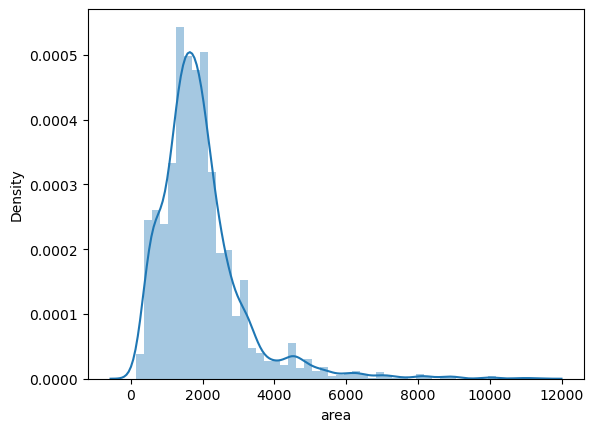

In [51]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

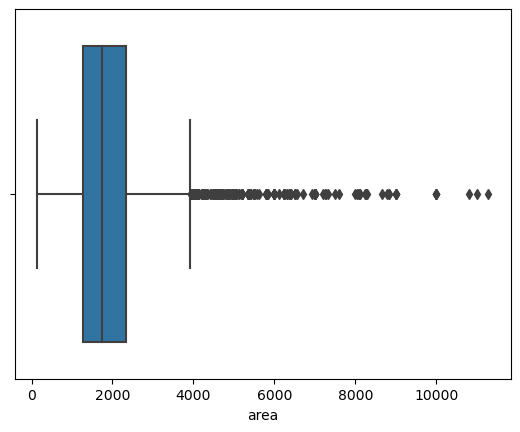

In [52]:
sns.boxplot(x= df['area'])

- Now in boxplot the outlier is not  data errors. These are genuine points because it is showing value for big properties.

In [53]:
df['area'].describe()

count     3633.000000
mean      1951.315717
std       1216.359023
min        145.000000
25%       1261.000000
50%       1749.000000
75%       2329.000000
max      11286.000000
Name: area, dtype: float64

**Observation**

- Skewness in the area graph was observed due to an extreme outlier, leading to a significant difference between  the mean and median.
- utilized the describe function to identify the outlier and noticed that the mean was higher, indicating the presence of extreme values.
- Detected and removed rows with area values greater than 1 lakh rupees, contributing to an improved distribution plot by mitigating skewness.
- Identified properties with area greater than 10,000 square feet, revealing data entry errors in about 20 rows. These erroneous entries were subsequently removed.
- Addressed genuine outliers by updating carpet area values based on built up area, resulting in a distribution plot with reduced skewness.
- The updated boxplot displayed outliers that are now indicative to genuine data points for large properties, distinguishing them from erroneous entries.


# Bedroom

/tmp/ipykernel_49857/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

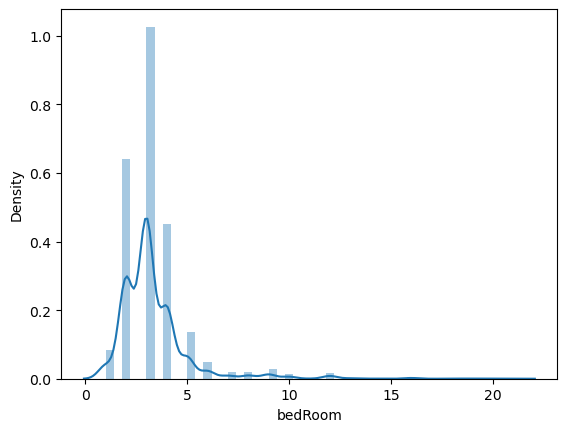

In [54]:
sns.distplot(df['bedRoom'])

- Mostly bedroom value between 3 to 5 and also some outliers value like 15 -20 bedroom.


<Axes: xlabel='bedRoom'>

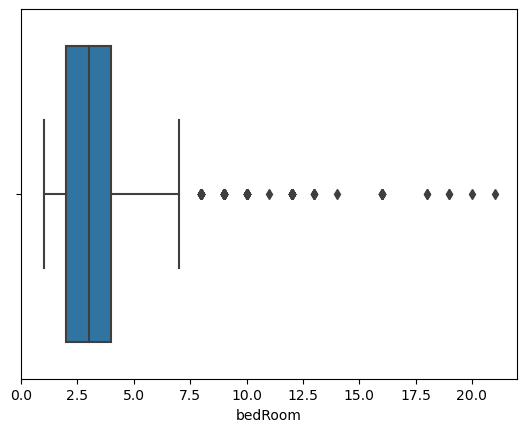

In [55]:
sns.boxplot(x= df['bedRoom'])

In [56]:
df['bedRoom'].describe()

count    3633.000000
mean        3.332508
std         1.827224
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [57]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
983,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,1,49
234,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,1,22
1549,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
3296,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2220,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,1,70
257,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,1,57
896,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41
2347,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49
1480,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
3142,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49


-  identify properties where bedroom size is greater than 10.
- Around 40 value found where bedroom size is greater than 10.
- I limited bedroom value till 10 bedroom size as bedroom feature I need in analysis so I want to prefer till 10 bedroom size.

In [58]:
df = df[df['bedRoom'] <= 10]

In [59]:
df.shape

(3588, 23)

/tmp/ipykernel_49857/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

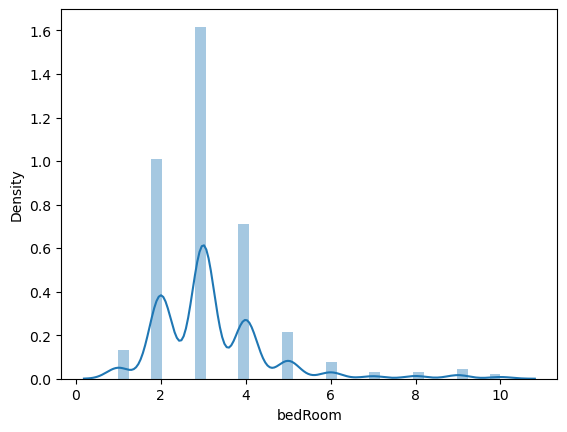

In [60]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

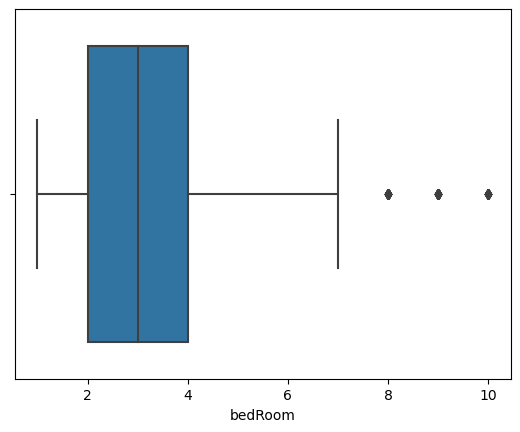

In [61]:
sns.boxplot(x= df['bedRoom'])

In [63]:
df['bedRoom'].describe()

count    3588.000000
mean        3.202620
std         1.390126
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

**Observation**

- Most properties have bedroom values ranging between 3 to 5, with a few outliers having bedroom sizes of 15 to 20.
- Properties with bedroom sizes greater than 10 were identified,revealing approximately 40 such instances.
- To streamline the analysis and focus on relevant features, the bedroom sizes was capped at 10 bedrooms, excluding instances with sizes beyond the limit.

# Bathroom

/tmp/ipykernel_49857/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

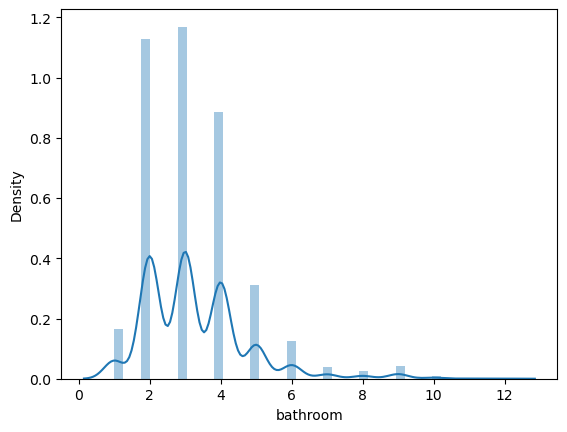

In [64]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

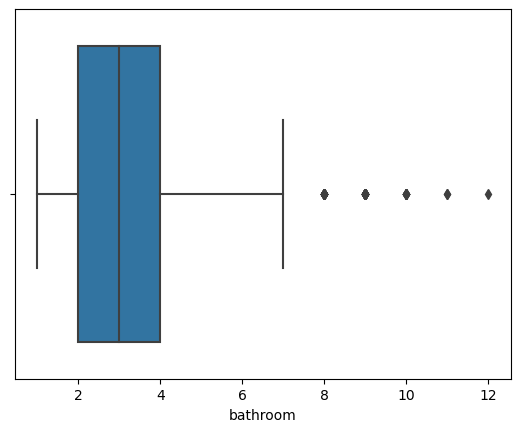

In [65]:
sns.boxplot(x=df['bathroom'])

In [66]:
df[df['bathroom'] >10].sort_values('bathroom', ascending= False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3686,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
534,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,1,38
1257,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39


- find everything fine 


In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,21605.0,3240.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


# Super Built up Area

/tmp/ipykernel_49857/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

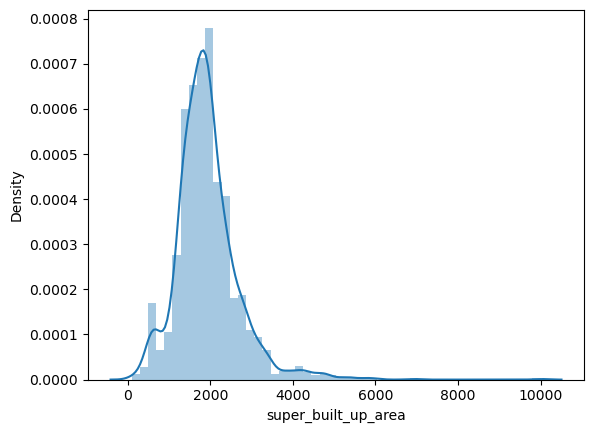

In [68]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

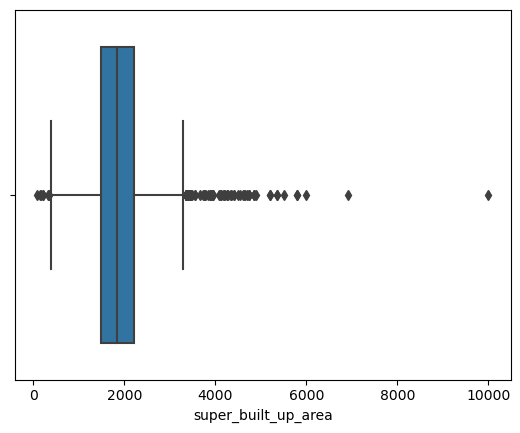

In [69]:
sns.boxplot(x=df['super_built_up_area'])

- greater than 6000 value area flat identify and by looking them find these are genuine value for properties.


In [70]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [71]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
736,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140
2486,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


- Identified flats with an area greater than 6000 sq.ft.

- Conducted a visual inspection to confirm the authenticity of these larger-sized properties.

# Built up Area

/tmp/ipykernel_49857/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

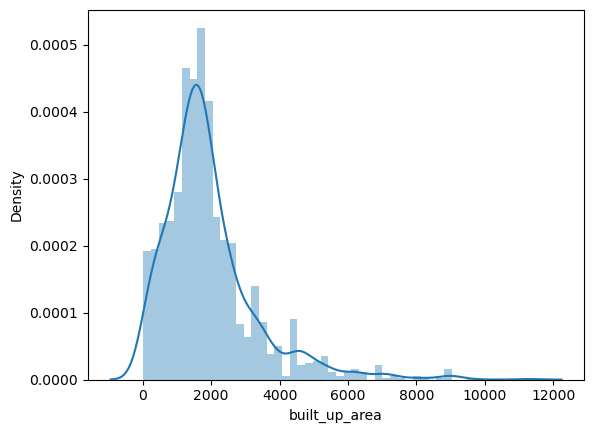

In [72]:
sns.distplot(df['built_up_area'])

<Axes: >

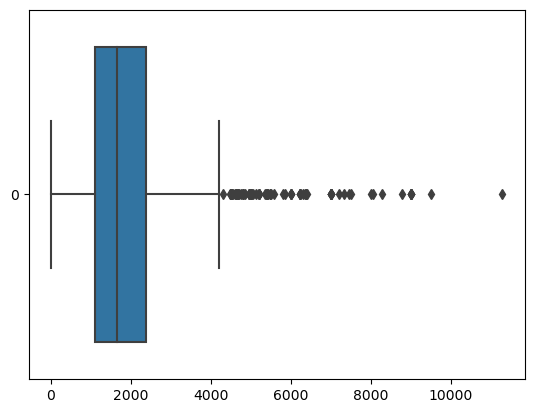

In [74]:
sns.boxplot(df['built_up_area'], orient='h')

- Everything found logical so nothing need to changed


In [75]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1856,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42


# Carpet Area

/tmp/ipykernel_49857/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

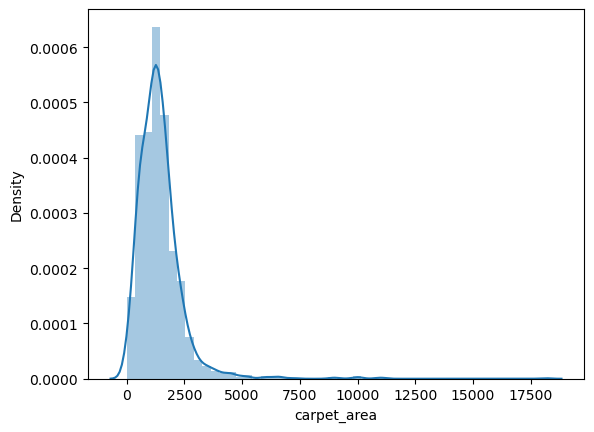

In [76]:
sns.distplot(df['carpet_area'])

<Axes: >

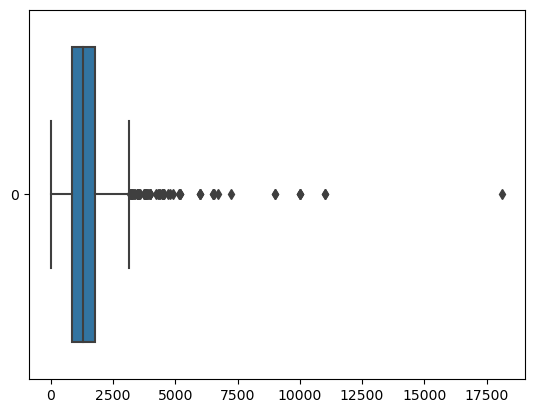

In [78]:
sns.boxplot(df['carpet_area'],orient='h')

In [79]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1546,house,independent,sector 26,18.4,1859.0,4518.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,2,60
2109,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60
3761,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,2,44


- Applied filter above 10000 area to see how many properties above 10000 area.

In [80]:
df.loc[3761,'carpet_area'] = 1812

In [81]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1546,house,independent,sector 26,18.4,1859.0,4518.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,2,60
2109,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [82]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,21605.0,3240.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


# Luxury Score

/tmp/ipykernel_49857/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

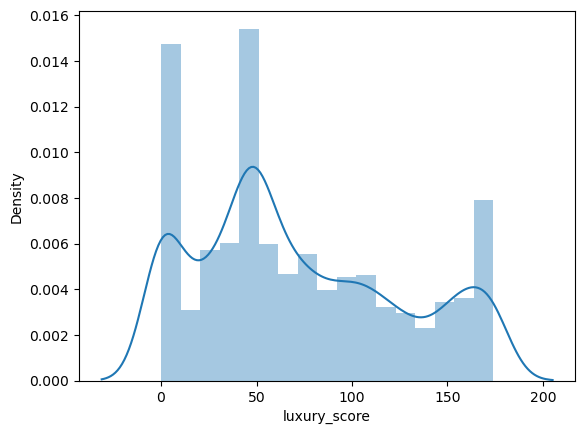

In [83]:
sns.distplot(df['luxury_score'])

<Axes: >

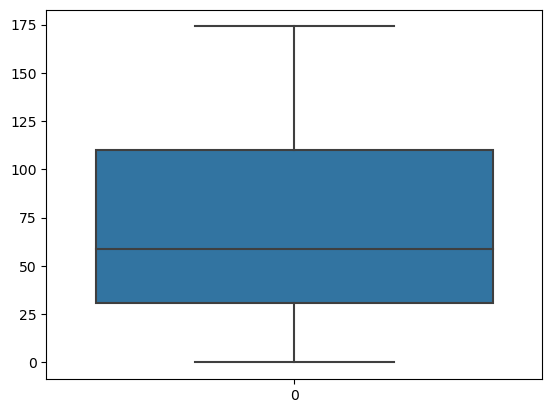

In [84]:
sns.boxplot(df['luxury_score'])

- No outliers found in luxury score

In [93]:
df.shape

(3588, 23)

- recalculating price per sqft column to just ensure no changes occur after area value change

In [94]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

- now this is updated price per sqft

In [95]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,21605.0,3240.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8701.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7081.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


/tmp/ipykernel_49857/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

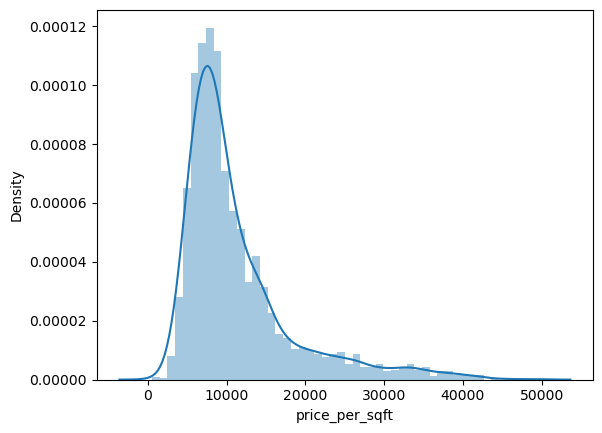

In [96]:
sns.distplot(df['price_per_sqft'])

<Axes: >

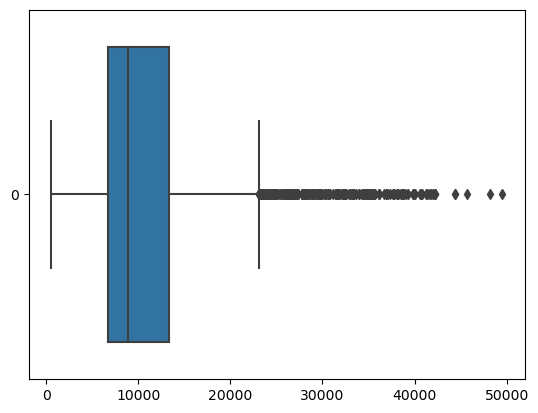

In [98]:
sns.boxplot(df['price_per_sqft'], orient='h')

- no changes found in price per sqft, just 4 properties can check above 42000

In [99]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
852,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88
1088,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121
1599,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7
1957,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
2226,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
2798,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44
2978,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3031,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
3498,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,1,0


- after watch the data in glance can say some properties price per sqft is valid but some other outliers can also see where
price , orice square feet all right but if we compare area and befroom together then can found some outlier. ex- in 1125 area and 9 bedroom which is logically not possible.

In [100]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

185.89333333333335

- so fetch only point where price is less than 20000 as here datpoints is mostly correct and find area and bedroom ratio and for 2 percent value which is 183 find. 
- so less than 20000 price square feet 2 percent value is we have which area and bedroom ratio is 185 and less than 185 number will treat as outlier.

In [103]:
df[(df['area']/df['bedRoom'])<185]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
58,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10,7,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0,0,0,0,0,0,0
150,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,4.0,East,Moderately Old,NaN,62.0,60.0,0,0,0,0,1,2,40
172,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0
225,house,my home,sector 110,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2,2,2,3.0,West,Moderately Old,NaN,270.0,NaN,0,0,0,0,0,0,22
239,house,independent,sector 9,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5,3,2,2.0,NaN,Undefined,NaN,450.0,NaN,0,0,0,0,0,0,0
250,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5,3,1,2.0,NaN,Moderately Old,NaN,675.0,NaN,0,0,0,0,0,0,0
296,house,row house,sector 105,0.43,9130.0,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 s...,3,3,3,2.0,NaN,Relatively New,NaN,1050.0,NaN,0,0,0,0,0,0,0
299,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0
309,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1,1,0,0,0,2,36
321,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0


- so observe some data error here

In [117]:
df[(df['area']/df['bedRoom'])<185].shape

(78, 23)

- now again find area is to bedroom ratio for price per square feet less than 20000 and took bottom 5 percentile to see what should be the good ratio of square feet for bedroom for given area in a house.

In [119]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

252.3

In [122]:
df[df['area']/df['bedRoom'] <252].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3282,house,independent,sector 28,0.75,20833.0,360.0,Plot area 40(33.45 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,7
2247,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5,3,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0,0,0,0,0,0,0
239,house,independent,sector 9,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5,3,2,2.0,NaN,Undefined,NaN,450.0,NaN,0,0,0,0,0,0,0
3679,flat,signature global solera,sector 107,0.29,5930.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,3.0,East,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45
972,flat,ansal api sushant estate,sector 52,0.29,11600.0,250.0,Carpet area: 250 (23.23 sq.m.),1,1,0,0.0,NaN,Moderately Old,NaN,NaN,250.0,0,0,0,0,0,2,49


- some data points found which ratio of area is to bedroom is less than 252 which means in very small area number of bedroom created , which is logically not right

In [127]:
df[df['area']/df['bedRoom'] <252].shape

(196, 24)

- As per my basic understanding of real state market can say these data belongs to plot rather than flat which is ,arket uncorrectly by broker on site as in plot if we construct any house it can be of 3 to 4 floor and easliy 5 , 6 bedroom can create on given area. 
- second it could be multi store house per floor 2 bedroom or 3 bedroom based on given area.

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


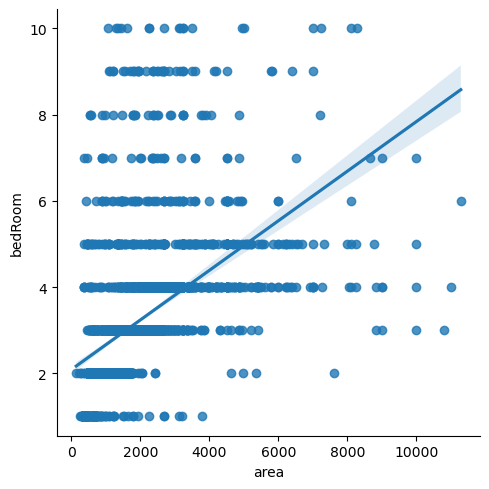

In [123]:
sns.lmplot(data=df, x= 'area', y='bedRoom')

- Plot Lm plot and found some datapoint where plot size is less than 2000 and bedroom is more than 6 so this is prospective outlier

In [125]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [126]:
df['area_room_ratio']

0        653.333333
1        683.000000
2        810.000000
3        804.500000
4        635.500000
5        666.666667
6        240.500000
7        509.500000
8        550.000000
9        325.000000
10       658.666667
11       681.000000
12       733.333333
13       954.000000
14       655.000000
15       309.600000
16       808.500000
17       802.666667
18       716.666667
19       552.500000
20       682.500000
21       601.666667
22      1750.000000
24       450.000000
25       650.000000
26       506.250000
27      1026.600000
28       695.666667
29       450.000000
30       636.666667
31       687.500000
32       620.000000
33       793.250000
34       432.000000
35       700.000000
36       683.000000
37       848.333333
38       300.500000
39       457.500000
40       895.000000
41       668.750000
42       786.000000
43      1600.000000
44       763.333333
45       550.000000
46       462.500000
47       432.000000
48       800.000000
49       486.000000
50       750.000000


In [128]:
(df[df['area_room_ratio'] < 252]) ['bedRoom'].value_counts()

bedRoom
2     53
3     38
5     28
4     17
6     17
9     15
8     12
7      8
10     7
1      1
Name: count, dtype: int64

In [129]:
df = df[df['area_room_ratio'] > 100]

In [131]:
outliers_df = df[(df['area_room_ratio'] < 252) & (df['bedRoom'] > 3)]

- where area room ratio is less than 250 and bedroom is more than 3 applied transformation

In [132]:
outliers_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
58,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10,7,3,4.0,East,Moderately Old,NaN,1300.00,NaN,0,0,0,0,0,0,0,130.000000
172,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0,113.000000
209,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.00,NaN,0,0,0,0,0,0,0,222.750000
250,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5,3,1,2.0,NaN,Moderately Old,NaN,675.00,NaN,0,0,0,0,0,0,0,135.000000
299,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
309,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,4.0,North,Moderately Old,NaN,1620.00,NaN,1,1,0,0,0,2,36,162.000000
321,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.00,NaN,0,0,0,0,0,0,0,150.000000
368,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,2.0,NaN,Moderately Old,NaN,981.00,NaN,0,0,0,0,0,0,0,196.200000
371,house,independent,sector 4,0.92,15257.0,603.0,Plot area 67(56.02 sq.m.),4,4,3,4.0,East,Moderately Old,NaN,603.00,NaN,0,0,0,0,1,0,0,150.750000
378,house,palam vihar extension west zone rwa,sector 2,0.40,4444.0,900.0,Plot area 900(83.61 sq.m.),6,4,2,2.0,West,Moderately Old,NaN,900.00,NaN,0,0,0,0,0,0,36,150.000000


In [133]:
outliers_df.shape

(85, 24)

In [135]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

/tmp/ipykernel_49857/3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [137]:
outliers_df['bedRoom'].shape

(85,)

In [138]:
df.update(outliers_df)

/tmp/ipykernel_49857/3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
/tmp/ipykernel_49857/3159295313.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers_df)
/tmp/ipykernel_49857/3159295313.py:1: FutureWarning: Downcasting behavior in Serie

**Observation & Explanation**

- Firstly, I calculated the area-to-bedroom ratio for datapoints where the price per square foot is below 20000.
- This ratio helps understand the relationship between the area and the number of bedrooms. The intention is to identify potential outliers.
- After obtaining the ratios, I determined the bottom 5th percentile, considering these as potential outliers.
- The calculated value of 252 was selected as a threshold.Any datapoint below this threshold may indicate a data error, as it suggests an unusually high number of bedrooms for a very small area.
- To validate this, I checked the original dataset for datapoints where the area is small, but the bedroom count is 
  high. Subsequently, I created an "lmplot" graph with area on the x-axis and bedroom count on the y axis.
- The graph revealed problematic area where the bedroom count is disproportionately high for the given small area.
- Removed datapoints where the area to room ratio was less than 100.
- Applied a transformation to address outliers with a ratio less than 252 and more than 3 bedrooms , dividing the 
  number of bedrooms by the number of floors for normalization.
- The transformation helps correct anomalies where the original bedroom count appeared unusually high given the available space.
- In summary, this analysis helps identify potential data errors by highlighting areas where the number of bedrooms is unexpectedally high even the limited space.

In [139]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174,653.333333
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99,683.000000
2,house,vatika india next,sector 82,7.00,21605.0,3240.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105,810.000000
3,house,independent,sector 12,1.40,8701.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0,804.500000
4,flat,maxworth city residences,sector 10a,0.90,7081.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52,635.500000


In [141]:
df['area_room_ratio'] = df['area']/df['bedRoom']

/tmp/ipykernel_49857/465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [142]:
df[(df['area_room_ratio'] < 252 ) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
172,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
209,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
299,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
321,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
819,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1207,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
1726,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
2102,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
2333,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
2511,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000


- in the transformation divide number of bedroom with number of floor, if there is 10 bedroom and 4 floor then roughly per floor bedroom would be 3 in number
- and update in original data

In [143]:
df[(df['area_room_ratio'] < 252 ) & (df['bedRoom'] > 4)].shape

(13, 24)

In [144]:
df.shape

(3568, 24)

In [145]:
df= df[~((df['area_room_ratio'] < 252 ) & (df['bedRoom'] > 4))]

/Users/nimishasingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


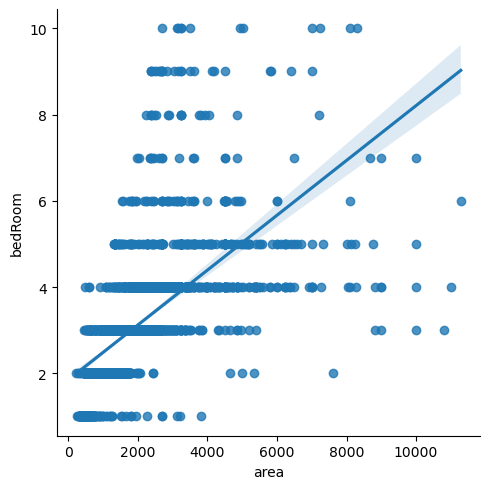

In [146]:
sns.lmplot(data = df, x= 'area', y = 'bedRoom')

- Recalculated the area-to-room ratio after applying the transformation to adjust the number of bedrooms.
- Identified 13 points where the number of bedrooms was more than 4, a result of having only one floor.
- Removed these 13 points, as the transformation was not applicable in cases where the number of floors was limited.
- Plotted another "lmplot" graph after the transformation and removal of points, observing the absence of data points wheret
  the area was limited, and the bathroom count was unusually high. so now data is improved after transformation and remove outliers some extent.

In [147]:
df.shape

(3555, 24)

In [148]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174,653.333333
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99,683.000000
2,house,vatika india next,sector 82,7.00,21605.0,3240.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105,810.000000
3,house,independent,sector 12,1.40,8701.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0,804.500000
4,flat,maxworth city residences,sector 10a,0.90,7081.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52,635.500000


In [149]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index= False)